# Data Dive 3: Cleaning Data
### Making Sense of NYC Restaurant Inspection Data

[This dataset](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j) provides restaurant inspections, violations, grades and adjudication information. It is freely available through the NYC Open Data portal, though for the purposes of this exercise we'll be using a static version I pulled in early September 2018 that is available at the url below. A Data Dictionary is available [here](https://data.cityofnewyork.us/api/views/43nn-pn8j/files/e3160d37-1b15-41ef-af6b-a830ed39cbc0?download=true&filename=Restaurant_Inspection_Open_Data_Dictionary_082214.xlsx). 

Throughout this exercise, we'll be drawing on skills highlighted in the [DataCamp course](https://www.datacamp.com/courses/cleaning-data-in-python), as well as miscellaneous other commands I've introduced in the first two classes. [Ten Minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) is a great reference for these. 


`https://grantmlong.com/data/DOHMH_New_York_City_Restaurant_Inspection_Results_20180911.csv`.  



In [1]:
import pandas as pd
import requests

%matplotlib inline

## Part 1: Load and Inspect
1. Load data from DataFrame
2. Find the number of rows and columns in the data
3. List the columns in the DataFrame
4. Display the first twenty rows


Load data from DataFrame

In [2]:
df = pd.read_csv('https://grantmlong.com/data/DOHMH_New_York_City_Restaurant_Inspection_Results_20180911.csv')

Find the number of rows and columns in the data

List the columns in the DataFrame

Display the first twenty rows

## Part 2: Explore and Summarize
1. Count the number of unique restaurants in the DataFrame.
2. Calculate the share of critical inpections.
3. Show a histogram of `SCORE`. 
4. Create a boxplot of `GRADE` against `SCORE`. 
5. Describe the `INSPECTION DATE` field. 
6. Count the number of null values for `VIOLATION DESCRIPTION`. 
7. Print twenty unique non-null values for `VIOLATION DESCRIPTION`. 


Count the number of unique restaurants in the DataFrame.

Calculate the share of critical inpections.

Show a histogram of `SCORE`. 

Create a boxplot of `GRADE` against `SCORE`. 

Describe the `INSPECTION DATE` field. 

Count the number of null values for VIOLATION DESCRIPTION.

Print twenty unique violation descriptions.

## Part 3: Create Clean Variables
1. Transform `INSPECTION DATE` to datetime in new variable `inspection_datetime`.
2. Create a `inspection_year` variable with the year of the `INSPECTION DATE`.
4. Drop observations with `inspection_year` before 2014. 
5. Drop observations with null values for `VIOLATION DESCRIPTION`. 
6. Create a `found_vermin` variable for any `VIOLATION DESCRIPTION` containing *vermin*, *mouse*, *mice*, or *rat*.
7. Create a `found_bugs` variable for any `VIOLATION DESCRIPTION` containing *insect*, *roach*, or *flies*.
8. Create a `bad_temp` variable for any `VIOLATION DESCRIPTION` containing *temperature* or *Âº F*.


Transform `INSPECTION DATE` to datetime in new variable `inspection_datetime`.

Create an `inspection_year` variable with the year of the `INSPECTION DATE`.


Drop observations with `inspection_year` before 2014. 

Drop observations with null values for `VIOLATION DESCRIPTION`.

Create a `found_vermin` variable for any `VIOLATION DESCRIPTION` containing *vermin*, *mouse*, *mice*, or *rat*.


Create a `found_bugs` variable for any `VIOLATION DESCRIPTION` containing *insect*, *roach*, or *flies*.

## Part 4: Create a Working Subset

1. Create a working subset DataFrame called `rest_df` with data grouped by restaurant - take the max value for the following fields: `'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'CUISINE DESCRIPTION', 'inspection_datetime',` and `'inspection_year'`.
2. Create another working subset DataFrame called `violation_df` with data grouped by restaurant - take the sum value for `'found_vermin'` and `'found_bugs'`.
3. Merge `rest_df` with `violation_df` to create `new_df`.
4. Show the top 20 value_counts for `CUISINE DESCRIPTION`.
5. Use the `cuisine_dict` to create a `cuisine_new` column with the `CUISINE DESCRIPTION`
6. Replace the `CUISINE DESCRIPTION` for `CafÃ©/Coffee/Tea` with `Coffee`.

Create a working subset DataFrame called `rest_df` with data grouped by restaurant - take the max value for the following fields: `'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'CUISINE DESCRIPTION', 'inspection_datetime',` and `'inspection_year'`.


Create another working subset DataFrame called `violation_df` with data grouped by restaurant - take the sum value for `'found_vermin'` and `'found_bugs'`.


Join `rest_df` with `violation_df` to create `new_df`.


Show the top 20 value_counts for `CUISINE DESCRIPTION`.

Replace the `CUISINE DESCRIPTION` for `CafÃ©/Coffee/Tea` with `Coffee`.

## Bonus Round: Using Outside Resources to Clean Data

Oftentimes, external services - or even services from other teams within your own company - will exist to help process data. One handy example case we can use here is the [NYC Geoclient](https://api.cityofnewyork.us/geoclient/v1/doc), a REST api that returns location information for an arbitrary address in New York City. It's an awesome resource!

For the purposes of this exercise, I've included an API id below and gave you the key in class, but you can sign up for your own key at the [NYC Developer Portal](https://developer.cityofnewyork.us/).

We can use this to find the exact location for each coffee shop in our data set. 

1. First, create a function to return the latitude and longitude for a given building number, street address, borough, and zip code. 
2. Next, create a new subset of data for a single cuisine. 
3. Apply the function from Step 1 to the df from Step 2.


In [24]:
def get_coordinates(row):

    url = 'https://api.cityofnewyork.us/geoclient/v1/address.json'

    params = {
        'houseNumber' : row['BUILDING'],
        'street' : row['STREET'],
        'borough' : row['BORO'],
        'zip' : row['ZIPCODE'],    
        'app_id' : '7cc1b653',
        'app_key' : 'XXXXXXXXX',   
    }

    raw_response = requests.get(url, params)
    
    try: 
        lat = raw_response.json()['address']['latitude']
        long = raw_response.json()['address']['longitude']
        value = str(lat) + ',' + str(long)
    except KeyError:
        value = None
    
    return value

In [25]:
cuisine_df = new_df.loc[new_df['CUISINE DESCRIPTION']=='Ice Cream, Gelato, Yogurt, Ices', ]

In [26]:
cuisine_df['coordinates'] = cuisine_df.apply(get_coordinates, axis=1)

/Users/grant/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
cuisine_df['latitude'] = cuisine_df.coordinates.str.split(',').str.get(0).astype(float)
cuisine_df['longitude'] = cuisine_df.coordinates.str.split(',').str.get(1).astype(float)


/Users/grant/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/grant/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


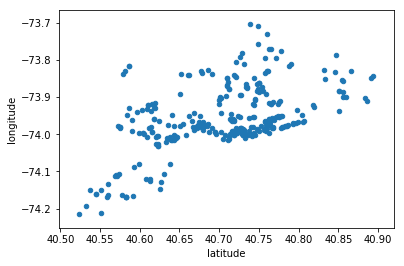

In [28]:
cuisine_df.plot.scatter('latitude', 'longitude')